In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
sp.init_printing() 
import warnings
warnings.filterwarnings("ignore")

#next line is so that we can use letters with SymPy matrix
sp.var('a, b, c, d, e, f, g, h, i, j, k', real = True)



## Goals and Commands

#### Goals
1. Creating Matricies and Vectors with NumPy and SymPy
2. Solving Linear Systems, Vector Equations and Matrix Equations.
3. RREF
4. Matrix-vector multiplication
5. Graphing solutions to simple linear systems
6. Plotting vectors



#### Commands
1. array, Matrix
2. rref()
3. solve commands
4. Meshgrid
5. Various plotting commands
6. Transpose
7. Operator @
8. Various matrix creation and manipulation commands

## Arrays, Vectors and Matrices

In Python, We have a few way of defining matrices. Using NumPy library is the most common way especially if all you need is quick calculation. Another library that will be useful is SymPy, which is a symbolic library and that means it is good with dealing with variables. As additional bonus, the outputs will look nicer as it will "LaTeX-ify" them.

In either case it is worth remembering that in programing, the indices of elements in the array usually start with zero. 

### Array/Matricies
First let's create matrix NumPy. For that we use `array` command.

In [22]:
A=np.array([[1,3,4],[0,3,5],[6,7,8]])
A

array([[1, 3, 4],
       [0, 3, 5],
       [6, 7, 8]])

This is essentially a 2-dimensional array. We can use brackets to get any value from the array. For example,

In [4]:
A[1,2] # this is second row and third column. You can also use A[1][2]

5

In [5]:
A[2] #this is the whole third row. Equivalent to A[2,:]

array([6, 7, 8])

In [6]:
A[:,1]  # this is second column

array([3, 3, 7])

In [7]:
A[-1,-2] #last row and second to last column. Negative indecies mean we are counting from the end.

7

In [8]:
A[:2,:-1] #first two rows and all except the last column

array([[1, 3],
       [0, 3]])

Next, let's use SymPy:

In [9]:
B = sp.Matrix([[4, 2, 1,4], [2, 1, -5, 4], [0, 0, 3, 4]])
B

⎡4  2  1   4⎤
⎢           ⎥
⎢2  1  -5  4⎥
⎢           ⎥
⎣0  0  3   4⎦

You can use brackets to get submatrices, rows and column or specific elements with B as well.
Note however, if you need to do numerical work on very large matricies, using NumPy is a better approach as it is faster. That said, Sympy can be useful as well. For example, SymPy is good if you want need to deal with variables or parameter inside your matrix. It also has a few nice useful commands and methods, for example `rref`:

In [10]:
Brref=B.rref()
Brref

⎛⎡1  1/2  0  0⎤           ⎞
⎜⎢            ⎥           ⎟
⎜⎢0   0   1  0⎥, (0, 2, 3)⎟
⎜⎢            ⎥           ⎟
⎝⎣0   0   0  1⎦           ⎠

The list of numbers after the matrix shows the pivot columns. (Note again, 0 is the first column, 2 is the third column and 3 is the fourth column).
It is techically possible to get RREF form using NumPy, but it isn't as simple as typing just one command. 

$\it{\text{[Extra challenge: See if you can write a function that accepts a NumPy matrix and returns RREF form of it.]}}$


It is also possible to convert SymPy matrix or lists to arrays and vice versa:

In [11]:
#Array to SymPy Matrix
AtoSym=sp.Matrix(A)
AtoSym

⎡1  3  4⎤
⎢       ⎥
⎢0  3  5⎥
⎢       ⎥
⎣6  7  8⎦

In [12]:
#Matrix to Array

BtoArray=np.array(B).astype(float)
BtoArray

array([[ 4.,  2.,  1.,  4.],
       [ 2.,  1., -5.,  4.],
       [ 0.,  0.,  3.,  4.]])

As you can see going from SymPy to NumPy, we have to specify the type of data inside the array. By default it is `object` and this will not work with most commands we want to use. Depending on your data you can also use `int` for integers if all of the numbers are integers.

Here are a few more useful commands related to arrays:

In [25]:
#shape returns size of the array

print(A.shape)  
print(B.shape)

# Command len() returns length of a list:

print(len(B)) #notice we get an amount of elements as if it's just a list
print(len(A)) #for an array we get in essence amount of rows.
print(np.size(A))  # this will give amount of elements of A

(3, 3)
(3, 4)
12
3
9


### Vectors
What about vectors? Vectors can be thought of as one dimensional arrays or matrices with 1 column/row. We can even add then or multiply by scalar in a quite obvious way.

In [29]:
v=np.array([1,2,3])
u=np.array([-1,0,4])
w=np.array([1,1,1,1])

In [30]:
print(v+u)
print(3*u)
print(2*u-4*v)

[0 2 7]
[-3  0 12]
[-6 -8 -4]


Something to keep in mind. Vectors as arrays are written horizontally, and not vertically how we usually write them in class. Therefore, it's worth knowing a transpose method `T` that swaps rows and columns. Note that both NumPy and SymPy have this method.

In [35]:
A=np.array([v,u])
A

array([[ 1,  2,  3],
       [-1,  0,  4]])

In [36]:
A.T

array([[ 1, -1],
       [ 2,  0],
       [ 3,  4]])

In [37]:
B=sp.Matrix(A)  
B.T

⎡1  -1⎤
⎢     ⎥
⎢2  0 ⎥
⎢     ⎥
⎣3  4 ⎦

As you can see, it was quite easy to join vectors in to a matrix using NumPy. We can do this in SymPy as well. There are few things of note here:

1. When you convert 1-dim array into SymPy matrix, it gives you a vertical vector.
2. We treat that vector as 1 column matrix and use `row_join` method to add more columns (but only one by one)

In [38]:
a1, a2 = sp.Matrix(v),sp.Matrix(u)

In [44]:
a1.row_join(a2)

⎡1  -1⎤
⎢     ⎥
⎢2  0 ⎥
⎢     ⎥
⎣3  4 ⎦

## Matrix Vector Multiplication

To perform matrix-vector multiplication, we use @ symbol. Be careful, * symbol is not the same as matrix multiplication in NumPy.

In [66]:
A=np.array([[1,3,4],[0,3,5]])
v=np.array([1,2,3])
A@v

array([19, 21])

Note that even though vector $\bf{v}$ was written horizonally, the product is done correctly (this will also be true for SymPy). Moreover, if $\bf{v}$ is 1-dim NumPy array, then the transpose will not work on it and so you have to be mindful of that. On the other hand, in SymPy, transpose will work. So you  have to be careful with orientation of your vectors:

In [69]:
B=sp.Matrix([[a,b,c],[d,e,f]])
v=sp.Matrix([1,2,3])
B@v     # note in SymPy, you can actually us * symbol as well.

⎡a + 2⋅b + 3⋅c⎤
⎢             ⎥
⎣d + 2⋅e + 3⋅f⎦

In [70]:
B@v.T  # note that you are getting an error now because of size mismatch.

ShapeError: Matrix size mismatch: (2, 3) * (1, 3).

## Solving a System of Linear Equations, Vector Equations or Matrix Equations.

SInce all three types of equations are essentially the same, the way we solve them is the same. From programing point of view, we are in essence will be thinking about them as matrix equations. In this file we will focus on equations that have a unique solution. If the equation has infinitely many solutions, most of the commands we are going to use here will not work and so a different approach has to be taken.

First let's look at SymPy. We have two different ways we can solve an equation. In fact, one of the ways will allow us to almost solve equations with infinitelly many solution as it will give us RREF.

#### Example: 

Solve a system of linear equations using SymPy:
$$x_1-3x_2=5$$
$$2x_1+x_2=3$$

#### Solution:

##### Way 1 (RREF)
We form an augmented matrix and find RREF

In [2]:
M=sp.Matrix([[1,-3,5],[2,1,3]])
Mrref=M.rref()[0] # we include [0] to get the first entry of the result, which is the matrix itself
Mrref  

⎡1  0  2 ⎤
⎢        ⎥
⎣0  1  -1⎦

We can now see that our solutions are $x_1=2$ and $x_2=-1$. We can extract it quite easily:

In [3]:
Mrref[:,-1]  # [:,-1] means we are taking every row, but only last column

⎡2 ⎤
⎢  ⎥
⎣-1⎦

#### Way 2 (RREF with coefficient matrix)

This case is more or less the same as the above case. The main difference is we want to start with a coefficient matrix and a vector of right hand values.

In [4]:
A=sp.Matrix([[1,-3],[2,1]])
b=sp.Matrix([5,3])

Augm=A.row_join(b)      # here we are attaching b to A on the right. 
Augm

⎡1  -3  5⎤
⎢        ⎥
⎣2  1   3⎦

In [5]:
Augm.rref()[0][:,-1]

⎡2 ⎤
⎢  ⎥
⎣-1⎦

##### Way 3 (Solve)
Another way is to use `solve` command. For this you do need a coefficient matrix and a "matrix" of right hand values as well.

In [6]:
A=sp.Matrix([[1,-3],[2,1]])
b=sp.Matrix([5,3])
A.solve(b)

⎡2 ⎤
⎢  ⎥
⎣-1⎦

#### Example: 

Repeat the problem using NumPy.

#### Solution:

If you want to use NumPy, it is similar to the last case for SymPy:

In [7]:
A=np.array([[1,-3],[2,1]])
b=np.array([5,3])
np.linalg.solve(A,b)

array([ 2., -1.])

#### End of Examples

There is another library that can do this `scipy.linalg` that we will use in the future. It works well with NumPy and you can use it too.

Finally, note that NumPy `solve` command works only if the linear system has a unique solution and the matrix is a square matrix. The SymPy version of `solve` allows for non-square matricies, but still needs unique solution. We will look at the case with infinitely many solutions in the future.

## Graphing and plots

Now let's look at our solution graphically. We will use Matplotlib for that. We will plot two lines from the original system of equations and our solution should be their intersection point. Note I used `Mrref[0,-1], Mrref[1,-1]` as my solution. This is from the first $\bf\text{ Way 1}$ we did above. We could have used other methods here as well.

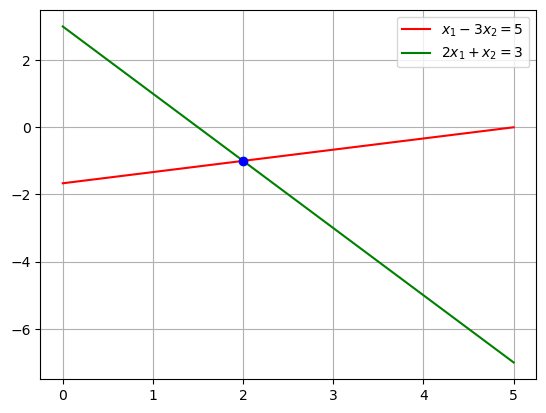

In [8]:
x1=np.linspace(0,5,100)   #take 100 points between 0 and 5 as our inputs for x1

l1=(5-x1)/(-3)    #this is x2 for the first line
l2=3-2*x1         #this is x2 for the second line

plt.plot(x1,l1,'-r',label='$x_1−3x_2=5$')  #The $ sign allows us to use LaTeX, which in this case is a nice way to get subscripts
plt.plot(x1,l2,'-g', label='$2x_1+x_2=3$')

plt.plot(Mrref[0,-1], Mrref[1,-1], 'b', marker="o") # point of intersection

plt.legend(loc='upper right')

plt.grid()
plt.show()

While it is possible to do 3D graphs here too, visualizing intersection of planes on matplotlib doesn't work nicely. There are other libraries that can help (like plotly or mayavi for example). While it isn't something we will be doing, you are welcome and encoraged to explore.

Next, we look at the example where the solution set to a system of linear equation is a plane. However, before we look at that, we need to understand command meshgrid. Meshgrid takes 2 or more lists and outputs all possible pairing of all elements from the given lists, creating a grid. For example:



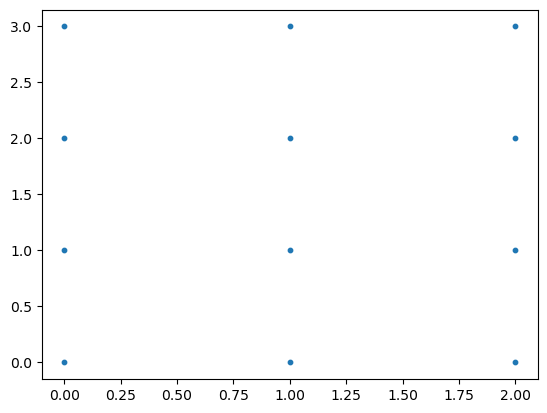

In [9]:
x=[0,1,2]     
y=[0,1,2,3]

X,Y=np.meshgrid(x,y)
plt.figure()
plt.scatter(X,Y, s=10)
plt.show()

As you can see, we had two lists (one with 3 elements and another with 4 elements), and we created a grid with 3*4=12 points. 

This is a useful command to create grids. And in our next example, we will use it to plot a plane.

#### Example:
Show the solution set to the following system of linear equations:

$$x_1+x_2-2x_3=3$$
$$2x_1+2x_2-4x_3=6$$
$$-2x_1-2x_2+4x_3=-6$$

#### Solution:

In [10]:
S=sp.Matrix([[1,1,-2,3],[2,2,-4,6],[-2,-2,4,-6]])
Srref=S.rref()
Srref

⎛⎡1  1  -2  3⎤      ⎞
⎜⎢           ⎥      ⎟
⎜⎢0  0  0   0⎥, (0,)⎟
⎜⎢           ⎥      ⎟
⎝⎣0  0  0   0⎦      ⎠

Notice, we have 2 free variables, so our solution will be a plane. Let's plot it. Similar to previous example, we will vary $x_2$ and $x_3$. We will take every possible pair of values of $x_2$ and $x_3$ as we take 100 equally spaced values for each between -5 and 5. And then solve for $x_1$:

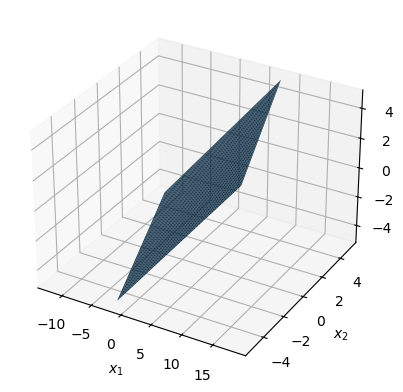

In [11]:
x2=np.linspace(-5,5,100)     # free variable
x3=np.linspace(-5,5,100)     # free variable
X2,X3 = np.meshgrid(x2,x3)   # meshgrid creates a lists of all possible coordinates in a given grid.
X1=3-X2+2*X3                 # note since X2 and X3 are lists, then so is X1.

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')
ax.zaxis.set_rotate_label(False)
ax.yaxis.set_rotate_label(False)
ax.xaxis.set_rotate_label(False)

ax.plot_surface(X1, X2, X3)
plt.show()

Here is another example.
#### Example:

Show the solution set for:

$$x_1+x_2-2x_3=3$$
$$2x_1+2x_2-2x_3=2$$
$$-2x_1-2x_2+4x_3=-6$$

#### Solution:

In [20]:
S=sp.Matrix([[1,1,-2,3],[2,2,-2,2],[-2,-2,4,-6]])
Srref=S.rref()
Srref

⎛⎡1  1  0  -1⎤        ⎞
⎜⎢           ⎥        ⎟
⎜⎢0  0  1  -2⎥, (0, 2)⎟
⎜⎢           ⎥        ⎟
⎝⎣0  0  0  0 ⎦        ⎠

Here we have 1 free variable, so solution will be a line.

<IPython.core.display.Javascript object>


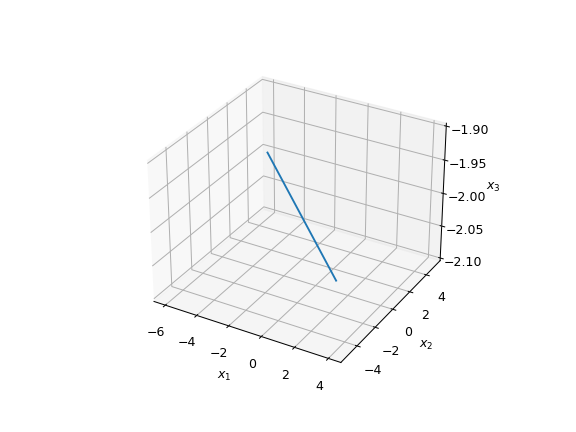

In [21]:
x2=np.linspace(-5,5,100)
x3=-2
x1=-1-x2

fig = plt.figure()
ax=fig.add_subplot(projection='3d')

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')
ax.zaxis.set_rotate_label(False)
ax.yaxis.set_rotate_label(False)
ax.xaxis.set_rotate_label(False)

ax.plot(x1, x2, x3)
plt.show()

### Plotting vectors

Sometimes we want to visualize our vectors. There are multiple way of seeing them. I will consider two: 

1. As points

2. As arrows

The goal is quite simple. I want an efficient way of plotting vectors. First, lets consider three vectors as points in $\mathbb{R}^2$

I will put them together into a matrix in such a way that first column will contain all first coordinates and the second column will have all second coordinates. 

In [46]:
a, b, c =np.array([1,2]), np.array([-1,3]), np.array([0,1])

In [49]:
V=np.array([a,b,c])
V

array([[ 1,  2],
       [-1,  3],
       [ 0,  1]])

Finally, we plot it using `scatter` command. We can not use `plot` here, because `plot` will try to connect all points with line segments.

<IPython.core.display.Javascript object>


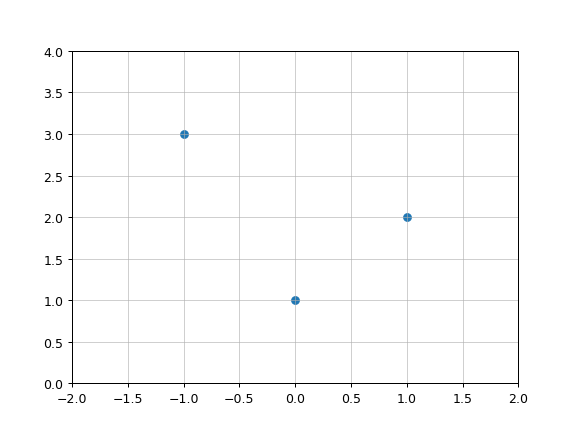

In [50]:
fig=plt.figure()
plt.axis([-2, 2, 0, 4])
plt.scatter(V[:,0],V[:,1])
plt.grid(alpha=0.6)
fig.show()

Next I will plot the same three vectors, but as arrows. For that we will use `quiver` command. For each arrow we need to specify beginning and end point. For vectors in standard position, beginning is the origin.

<IPython.core.display.Javascript object>


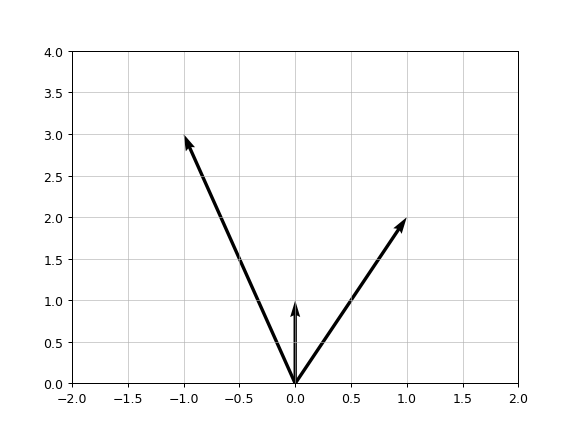

In [51]:
fig=plt.figure()
plt.axis([-2, 2, 0, 4])
plt.quiver([0,0,0], [0,0,0],V[:,0],V[:,1], angles='xy',scale_units='xy', scale=1)
plt.grid(alpha=0.6)
fig.show()

## Few addional useful commands

SymPy has a wide range of useful commands for matrix manipulation and matrix creation. Here are a few:

In [52]:
sp.eye(4)   # creates an 4x4 identity matrix

⎡1  0  0  0⎤
⎢          ⎥
⎢0  1  0  0⎥
⎢          ⎥
⎢0  0  1  0⎥
⎢          ⎥
⎣0  0  0  1⎦

In [53]:
np.identity(3)  #numpy version

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [8]:
sp.diag(1,2,3,1)  # diagonal matrix with given entries along main diagonal

⎡1  0  0  0⎤
⎢          ⎥
⎢0  2  0  0⎥
⎢          ⎥
⎢0  0  3  0⎥
⎢          ⎥
⎣0  0  0  1⎦

In [54]:
sp.Matrix(2,3,[1,2,3,4,5,6])  # creates a 2 by 3 matrix with given entries

⎡1  2  3⎤
⎢       ⎥
⎣4  5  6⎦

In [55]:
sp.zeros(3,2) # creates 3 by 2 zero matrix

⎡0  0⎤
⎢    ⎥
⎢0  0⎥
⎢    ⎥
⎣0  0⎦

In [12]:
# generate a random 3 by 4 matrix with 80% of entries being nonzero. entries are integers between 0 and 100
A=sp.randMatrix(3,4, percent = 80)

A

⎡7   0   0   73⎤
⎢              ⎥
⎢89  43  18  78⎥
⎢              ⎥
⎣17  57  42  0 ⎦

In [14]:
np.random.rand(3,2)  # random matrix in numpy. Note that entries are between 0 and 1

array([[0.94145582, 0.4051996 ],
       [0.82801456, 0.70918068],
       [0.97186956, 0.46866021]])

In [59]:
A.col_del(2)    # deletes specified column
A

⎡31  0   46⎤
⎢          ⎥
⎢0   80  88⎥
⎢          ⎥
⎣69  4   96⎦

In [60]:
A.row_del(1)  # deletes specified row
A

⎡31  0  46⎤
⎢         ⎥
⎣69  4  96⎦

In [63]:
A.col_insert(2,sp.Matrix([5,6]))  # add specified column to specified spot.

⎡31  0  5  46⎤
⎢            ⎥
⎣69  4  6  96⎦

## Optional graphing example to play around.

In the next cell, change vectors $\bf{a}$ and $\bf{b}$ to see a different grid created by them and change vector $\bf{c}$ to to see how it can be expressed as a linear combination of $\bf{a}$ and $\bf{b}$. The code is longer this time. Try to understand what each line does.

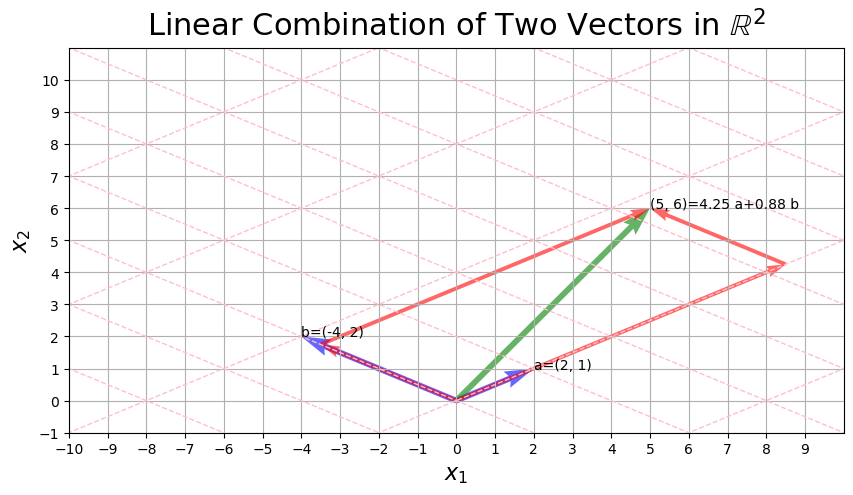

In [12]:
# Change a, b and c to see different grids and vectors. 
# Keep first coordinates between -9 and 9. Keep second coordinates between 0 and 9

a=np.array([2,1])
b=np.array([-4,2])

c=np.array([5,6])


### Set-up ###

fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlim([-10, 10])
ax.set_ylim([-1, 11])
ax.set_xlabel('$x_1$', fontsize =16)
ax.set_ylabel('$x_2$', fontsize =16)
ax.set_xticks(np.arange(-10, 10, 1))
ax.set_yticks(np.arange(-1, 11, 1))
plt.grid()

ax.set_title('Linear Combination of Two Vectors in $\mathbb{R}^2$', size = 22, x =0.5, y = 1.01)

### Grid ###

x = np.arange(-20, 20, 1)

for i in range(-20,20,1):    
    y1 = i*(-a[1]*b[0]/a[0]+b[1]) + a[1]/a[0]*x
    ax.plot(x, y1, ls = '--', color = 'pink', lw = 1)
    y2 = i*(-b[1]*a[0]/b[0]+a[1]) +b[1]/b[0]*x
    ax.plot(x, y2, ls = '--', color = 'pink', lw = 1)   
    
    
### Vectors #####   
# Command quiver plots an arrow. We need to specify from where to where the arrow should be drawn.
# The syntax here can be a bit confusing.
# quiver([x-coordinates of start], [y-coordinates of start], [x-coordinates of end], [y-coordinates of end], other stuff)
# In this case notice we plot 3 arrows, since we have 3 coordinates of each type.

ax.quiver([0,0,0], [0,0,0], [a[0],b[0],c[0]], [a[1],b[1],c[1]], angles='xy', scale_units='xy', color = ['b','b','g'], scale=1, alpha = .6)
ax.text(x = a[0], y = a[1], s = 'a=(%.0d, %.0d)' %(a[0],a[1]), fontsize = 10)
ax.text(x = b[0], y = b[1], s = 'b=(%.0d, %.0d)' %(b[0],b[1]), fontsize = 10)

### Check if c is in the span of a and b ### 

A=sp.Matrix([a,b,c]).T.rref()
A=np.array(A[0],dtype=float)
s1,s2=A[0,2]*a, A[1,2]*b

if A[1,1]==0 and A[1,2]!=0:
    ax.text(x = c[0], y = c[1], s = f'(%.0d, %.0d) is not in the span(a,b)' %(c[0],c[1]), fontsize = 16)
else:
    ax.quiver([0,0,s1[0],s2[0]], [0,0,s1[1],s2[1]], [s1[0],s2[0],s2[0],s1[0]], [s1[1],s2[1],s2[1],s1[1]],angles='xy', scale_units='xy', color = 'r', scale=1, alpha = .6,width=0.005)
    ax.text(x = c[0], y = c[1], s = f'(%.0d, %.0d)=%.02f a+%.02f b' %(c[0],c[1],A[0,2],A[1,2]), fontsize = 10)


plt.show()